In [704]:
##### python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [705]:
def correlation_matrix(df,title):
    sn.heatmap(corrMatrix_all, annot=True)
    ax.set_title(title, size=14)
    plt.tight_layout()
    return plt.show()

In [706]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [707]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [708]:
pd.notnull(insurance).count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [709]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


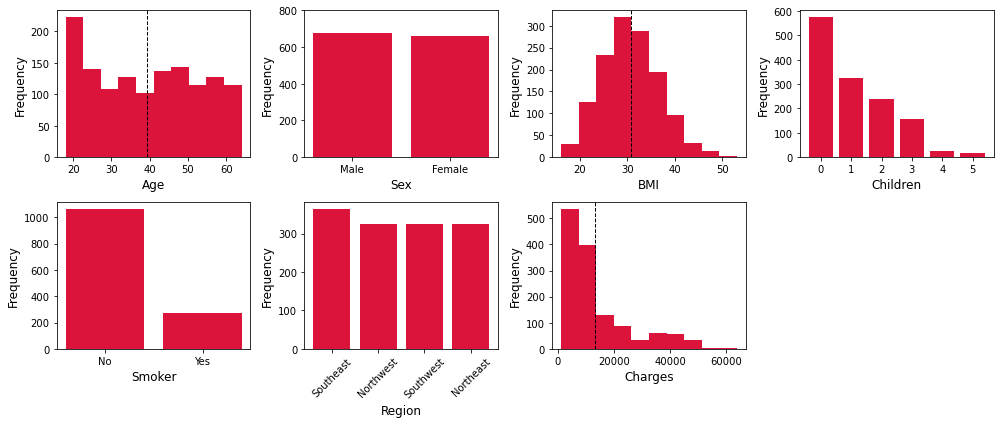

In [710]:
##### plots each categories overall 
fig, axs = plt.subplots(2,4,figsize=(14,6))

### age
axs[0,0].hist(insurance['age'], color='crimson')
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(insurance['age'].mean(), color='black', linewidth=1, linestyle='dashed')

### sex
sx = insurance['sex'].value_counts()
#insurance['sex'].value_counts()[0]
#insurance['sex'].value_counts()[1]
#print(sx)
x = np.arange(len(sx))
bars = ['Male','Female']
axs[0,1].bar(x, sx, color='crimson')
#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)

### BMI
axs[0,2].hist(insurance['bmi'], color='crimson')
#axs[0,2].set_title('BMI')
axs[0,2].set_xlabel('BMI', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].axvline(insurance['bmi'].mean(), color='black', linewidth=1, linestyle='dashed')

### children
child = insurance['children'].value_counts()
#print(child)
xc = np.arange(len(child))
barsc = np.array(np.arange(6))
axs[0,3].bar(xc, child, color='crimson')
#axs[0,3].set_title('Children')
axs[0,3].set_xlabel('Children', size=12)
axs[0,3].set_ylabel('Frequency', size=12)
axs[0,3].set_xticks(xc)
axs[0,3].set_xticklabels(barsc)

### smoker
smoker = insurance['smoker'].value_counts()
#print(smoker)
xsm = np.arange(len(smoker))
barssm = ['No','Yes']
axs[1,0].bar(xsm, smoker, color='crimson')
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xsm)
axs[1,0].set_xticklabels(barssm)

### region
region = insurance['region'].value_counts()
#print(region)
xr = np.arange(len(region))
barsr = ['Southeast','Northwest', 'Southwest', 'Northeast']
axs[1,1].bar(np.array(np.arange(4)), region, color='crimson')
#axs[1,1].set_title('Region')
axs[1,1].set_xlabel('Region', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].set_xticks(xr)
axs[1,1].set_xticklabels(barsr, rotation=45)

### charges
axs[1,2].hist(insurance['charges'], color='crimson')
#axs[1,2].set_title('Charges')
axs[1,2].set_xlabel('Charges', size=12)
axs[1,2].set_ylabel('Frequency', size=12)
axs[1,2].axvline(insurance['charges'].mean(), color='black', linewidth=1, linestyle='dashed')

fig.delaxes(ax= axs[1,3]) # delete empty plot.

plt.tight_layout()
plt.show()

In [711]:
##### trasform data
insurance_t = insurance.copy()
insurance_t['smoker'] = insurance_t['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t['sex'] = insurance_t['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t)
#print(insurance)

In [712]:
##### overall correlations
corrMatrix_all = insurance_t.corr()
print (corrMatrix_all)

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019  0.006660  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185  0.006640 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750 -0.004036  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673  0.035494  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000 -0.044124  0.787251
region    0.006660  0.006640 -0.004036  0.035494 -0.044124  1.000000 -0.051509
charges   0.299008 -0.057292  0.198341  0.067998  0.787251 -0.051509  1.000000


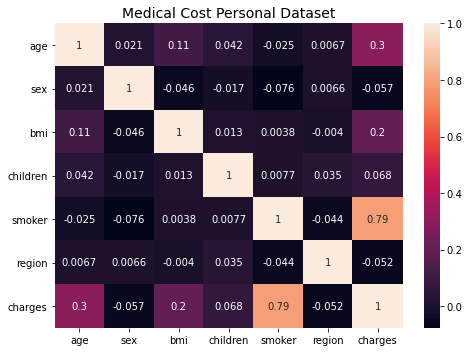

In [713]:
fig, ax = plt.subplots(figsize=(7,5))
correlation_matrix(corrMatrix_all, title='Medical Cost Personal Dataset')

In [714]:
##### trasform and select data
insurance_t2 = insurance.copy()
insurance_t2['smoker'] = insurance_t2['smoker'].apply(lambda x: 0 if x=='no' else 1)
#insurance_t2['sex'] = insurance_t2['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 3 if x=='southwest' else x)
#print(insurance_t2.head())
#print(insurance.head())

In [715]:
male = insurance_t2[insurance_t2['sex'] == 'male'].reset_index()
male.head()

,index,age,sex,bmi,children,smoker,region,charges
0,1,18,male,33.770,1,0,1,1725.55230
1,2,28,male,33.000,3,0,1,4449.46200
2,3,33,male,22.705,0,0,2,21984.47061
3,4,32,male,28.880,0,0,2,3866.85520
4,8,37,male,29.830,2,0,0,6406.41070


In [716]:
female = insurance_t2[insurance_t2['sex'] == 'female'].reset_index()
female.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,1,3,16884.92400
1,5,31,female,25.74,0,0,1,3756.62160
2,6,46,female,33.44,1,0,1,8240.58960
3,7,37,female,27.74,3,0,2,7281.50560
4,9,60,female,25.84,0,0,2,28923.13692


In [717]:
##### correlations
male_corr = male[['age', 'bmi', 'children', 'smoker', 'region', 'charges']]
corrMatrix_0 = male_corr.corr()
#print (corrMatrix_0)

female_corr = female[['age', 'bmi', 'children', 'smoker', 'region', 'charges']]
corrMatrix_1 = female_corr.corr()
#print (corrMatrix_1)

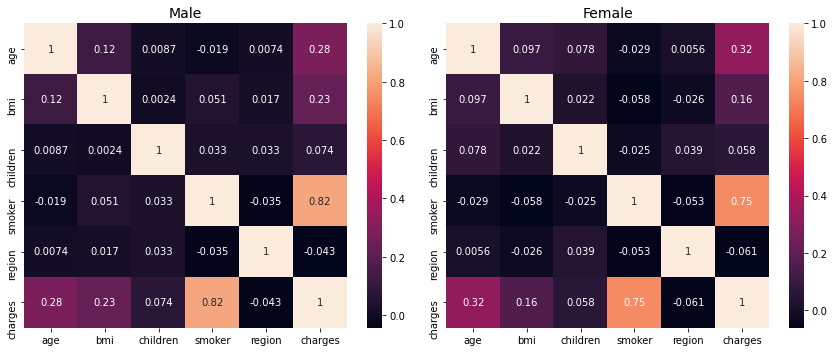

In [718]:
##### plot correlation matrix
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,5))

sn.heatmap(corrMatrix_0, ax=ax0, annot=True)
ax0.set_title('Male', size=14)
sn.heatmap(corrMatrix_1, ax=ax1, annot=True)
ax1.set_title('Female', size=14)
plt.tight_layout()
plt.show()

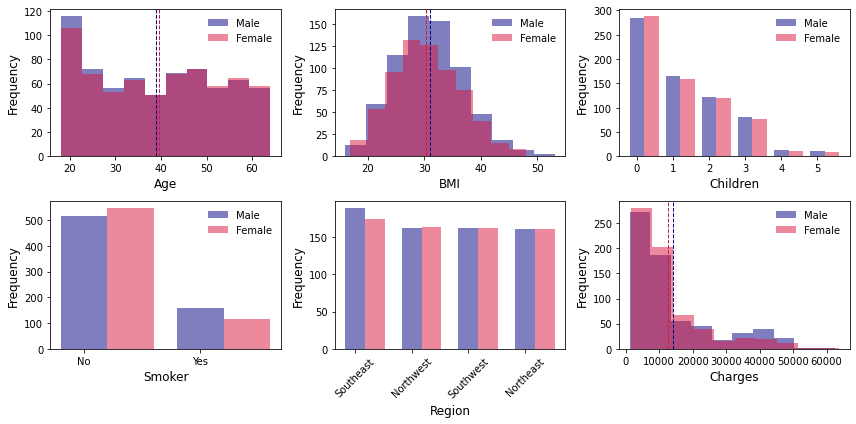

0.005247684396227782

In [724]:
##### plots each categories overall 
insureplot = insurance.copy()
maleplot = insureplot[insureplot['sex'] == 'male'].reset_index()
femaleplot = insureplot[insureplot['sex'] == 'female'].reset_index()
#print(maleplot)
#print(femaleplot)

fig, axs = plt.subplots(2,3,figsize=(12,6))

### age
axs[0,0].hist(maleplot['age'], color='navy', label='Male', alpha=0.5)
axs[0,0].hist(femaleplot['age'], color='crimson', label='Female', alpha=0.5)
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(maleplot['age'].mean(), color='navy', linewidth=1, linestyle='dashed')
axs[0,0].axvline(femaleplot['age'].mean(), color='crimson', linewidth=1, linestyle='dashed')
axs[0,0].legend(frameon=False)

'''
### sex
smp = maleplot['sex'].value_counts()
print(smp)
xsm = np.arange(len(smp))
barms = ['Male']

sfp = femaleplot['sex'].value_counts()
print(sfp)
xsf = np.arange(len(sfp))
barfs = ['Female']

axs[0,1].bar(xsm + 0, smp, color='navy')
axs[0,1].bar(xsm + 1, sfp, color='crimson')

#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)
'''

### BMI
axs[0,1].hist(maleplot['bmi'], color='navy', label='Male', alpha=0.5)
axs[0,1].hist(femaleplot['bmi'], color='crimson', label='Female', alpha=0.5)
#axs[0,1].set_title('BMI')
axs[0,1].set_xlabel('BMI', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].axvline(maleplot['bmi'].mean(), color='navy', linewidth=1, linestyle='dashed')
axs[0,1].axvline(femaleplot['bmi'].mean(), color='crimson', linewidth=1, linestyle='dashed')
axs[0,1].legend(frameon=False)


### children
childm = maleplot['children'].value_counts()
xmc = np.arange(len(childm))
barsmc = np.array(np.arange(6))

childf = femaleplot['children'].value_counts()
xfc = np.arange(len(childf))
barsfc = np.array(np.arange(6))

axs[0,2].bar(xmc + 0, childm, color='navy', label='Male', alpha=0.5, width=0.4)
axs[0,2].bar(xmc + 0.4, childf, color='crimson', label='Female', alpha=0.5, width=0.4)
#axs[0,2].set_title('Children')
axs[0,2].set_xlabel('Children', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].set_xticks(xmc)
axs[0,2].set_xticklabels(barsmc)
axs[0,2].legend(frameon=False)


### smoker
smokerm = maleplot['smoker'].value_counts()
#print(smokerm)
xmsm = np.arange(len(smokerm))
barsmsm = ['No','Yes']

smokerf = femaleplot['smoker'].value_counts()
#print(smokerf)
xfsm = np.arange(len(smokerf))
barsfsm = ['No','Yes']

axs[1,0].bar(xmsm + 0, smokerm, color='navy', label='Male', alpha=0.5, width=0.4)
axs[1,0].bar(xmsm + 0.4, smokerf, color='crimson', label='Female', alpha=0.5, width=0.4)
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xmsm)
axs[1,0].set_xticklabels(barsmsm)
axs[1,0].legend(frameon=False)

### region
regionm = maleplot['region'].value_counts()
xmr = np.arange(len(regionm))
barsmr = ['Southeast','Northwest', 'Southwest', 'Northeast']

regionf = femaleplot['region'].value_counts()
xfr = np.arange(len(regionf))
barsfr = ['Southeast','Northwest', 'Southwest', 'Northeast']

axs[1,1].bar(xmr + 0, regionm, color='navy', label='Male', alpha=0.5, width=0.35)
axs[1,1].bar(xmr + 0.35, regionf, color='crimson', label='Female', alpha=0.5, width=0.35)
#axs[1,1].set_title('Region')
axs[1,1].set_xlabel('Region', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].set_xticks(xr)
axs[1,1].set_xticklabels(barsr, rotation=45)


### charges
axs[1,2].hist(maleplot['charges'], color='navy', label='Male', alpha=0.5)
axs[1,2].hist(femaleplot['charges'], color='crimson', label='Female', alpha=0.5)
#axs[1,2].set_title('Charges')
axs[1,2].set_xlabel('Charges', size=12)
axs[1,2].set_ylabel('Frequency', size=12)
axs[1,2].axvline(maleplot['charges'].mean(), color='navy', linewidth=1, linestyle='dashed')
axs[1,2].axvline(femaleplot['charges'].mean(), color='crimson', linewidth=1, linestyle='dashed')
axs[1,2].legend(frameon=False)

#fig.delaxes(ax= axs[1,3]) # delete empty plot.

plt.tight_layout()
plt.show()

##### statistics, p-value
statistic, pvalue = stats.ttest_ind(male['smoker'], female['smoker'], equal_var=False)
pvalue

In [723]:
stats.ttest_ind(male['smoker'], female['smoker'], equal_var=False)

Ttest_indResult(statistic=2.7960611255948034, pvalue=0.005247684396227782)